In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

## Movies Dataframe

In [2]:
movies = pd.read_csv("movies.csv")
# To display the top 5 rows
movies.head(5)

,Unnamed: 0,budget,id,imdb_id,original_language,original_title,popularity,release_year,release_date,revenue,runtime,title,vote_average,vote_count
0,1,30000000.0,862.0,tt0114709,en,Toy Story,21.946943,1995.0,10/30/95,373554033.0,81.0,Toy Story,7.7,5415.0
1,2,65000000.0,8844.0,tt0113497,en,Jumanji,17.015539,1995.0,12/15/95,262797249.0,104.0,Jumanji,6.9,2413.0
2,3,16000000.0,31357.0,tt0114885,en,Waiting to Exhale,3.859495,1995.0,12/22/95,81452156.0,127.0,Waiting to Exhale,6.1,34.0
3,4,0.0,45325.0,tt0112302,en,Tom and Huck,2.561161,1995.0,12/22/95,0.0,97.0,Tom and Huck,5.4,45.0
4,5,35000000.0,9091.0,tt0114576,en,Sudden Death,5.231580,1995.0,12/22/95,64350171.0,106.0,Sudden Death,5.5,174.0


In [3]:
# Total number of rows and columns
movies.shape

(13687, 14)

### Data types

In [4]:
# Checking the data type
movies.dtypes

Unnamed: 0             int64
budget               float64
id                   float64
imdb_id               object
original_language     object
original_title        object
popularity           float64
release_year         float64
release_date          object
revenue              float64
runtime              float64
title                 object
vote_average         float64
vote_count           float64
dtype: object

### Drop irrelevant columns

In [5]:
movies = movies.drop(['original_title', 'release_date', "Unnamed: 0", "imdb_id", "original_language"], axis=1)
movies.head(5)

,budget,id,popularity,release_year,revenue,runtime,title,vote_average,vote_count
0,30000000.0,862.0,21.946943,1995.0,373554033.0,81.0,Toy Story,7.7,5415.0
1,65000000.0,8844.0,17.015539,1995.0,262797249.0,104.0,Jumanji,6.9,2413.0
2,16000000.0,31357.0,3.859495,1995.0,81452156.0,127.0,Waiting to Exhale,6.1,34.0
3,0.0,45325.0,2.561161,1995.0,0.0,97.0,Tom and Huck,5.4,45.0
4,35000000.0,9091.0,5.231580,1995.0,64350171.0,106.0,Sudden Death,5.5,174.0


In [6]:
# Total number of rows and columns
movies.shape

(13687, 9)

## Cleaning the Dataframe

### Removing rows with null values

In [7]:
print(movies.isnull().sum())

budget           1
id               1
popularity       2
release_year    17
revenue          2
runtime         91
title            2
vote_average     2
vote_count       2
dtype: int64


In [8]:
movies = movies.dropna() 
movies.count()

budget          13579
id              13579
popularity      13579
release_year    13579
revenue         13579
runtime         13579
title           13579
vote_average    13579
vote_count      13579
dtype: int64

## Ratings Dataframe

In [9]:
ratings = pd.read_csv("ratings.csv")
# To display the top 5 rows
ratings.head(5)

,Unnamed: 0,userId,movieId,rating,timestamp
0,1,1.0,10474.0,4.5,1.425942e+09
1,2,1.0,2108.0,4.0,1.425942e+09
2,3,1.0,745.0,4.5,1.425941e+09
3,4,1.0,77.0,4.0,1.425942e+09
4,5,1.0,141.0,5.0,1.425941e+09


In [10]:
ratings.shape

(8177973, 5)

### Datatypes

In [11]:
# Checking the data type
ratings.dtypes

Unnamed: 0      int64
userId        float64
movieId       float64
rating        float64
timestamp     float64
dtype: object

### Drop irrelevant columns

In [12]:
ratings = ratings.drop(['userId', 'timestamp', "Unnamed: 0"], axis=1)
ratings.head(5)

,movieId,rating
0,10474.0,4.5
1,2108.0,4.0
2,745.0,4.5
3,77.0,4.0
4,141.0,5.0


In [13]:
ratings.shape

(8177973, 2)

### Rename movieId column to id

In [14]:
ratings = ratings.rename(columns={"movieId":"id", "rating":"rating"})
ratings.head()

,id,rating
0,10474.0,4.5
1,2108.0,4.0
2,745.0,4.5
3,77.0,4.0
4,141.0,5.0


## Cleaning the Dataframe

### Removing rows with null values

In [15]:
print(ratings.isnull().sum())

id        13503
rating        0
dtype: int64


In [16]:
ratings = ratings.dropna() 
ratings.count()

id        8164470
rating    8164470
dtype: int64

In [17]:
### Grouping by movie

In [18]:
ratings = ratings.groupby(['id']).mean()
ratings.count()

rating    13439
dtype: int64

## Merging both Dataframes

In [19]:
movies_ratings = movies.merge(ratings, on="id", how = 'inner')
movies_ratings.head()

,budget,id,popularity,release_year,revenue,runtime,title,vote_average,vote_count,rating
0,30000000.0,862.0,21.946943,1995.0,373554033.0,81.0,Toy Story,7.7,5415.0,3.888157
1,65000000.0,8844.0,17.015539,1995.0,262797249.0,104.0,Jumanji,6.9,2413.0,3.236953
2,16000000.0,31357.0,3.859495,1995.0,81452156.0,127.0,Waiting to Exhale,6.1,34.0,2.875713
3,0.0,45325.0,2.561161,1995.0,0.0,97.0,Tom and Huck,5.4,45.0,3.129191
4,35000000.0,9091.0,5.231580,1995.0,64350171.0,106.0,Sudden Death,5.5,174.0,3.008365


In [20]:
movies_ratings.describe()

,budget,id,popularity,release_year,revenue,runtime,vote_average,vote_count,rating
count,1.334100e+04,13341.000000,13341.000000,13341.000000,1.334100e+04,13341.000000,13341.000000,13341.000000,13341.000000
mean,4.373654e+06,104655.621168,3.033345,1992.425980,1.229104e+07,94.711266,5.653444,118.387377,3.055965
std,1.787296e+07,110608.802579,7.232004,23.483463,7.012271e+07,37.885699,1.866292,532.411707,0.724175
min,0.000000e+00,11.000000,0.000000,1900.000000,0.000000e+00,0.000000,0.000000,0.000000,0.500000
25%,0.000000e+00,25550.000000,0.413422,1979.000000,0.000000e+00,86.000000,5.000000,3.000000,2.687500
50%,0.000000e+00,56482.000000,1.180238,2001.000000,0.000000e+00,95.000000,6.000000,10.000000,3.153846
75%,0.000000e+00,146270.000000,3.770115,2010.000000,0.000000e+00,107.000000,6.800000,35.000000,3.500000
max,3.800000e+08,462788.000000,547.488298,2018.000000,2.068224e+09,1140.000000,10.000000,12269.000000,5.000000


Observaciones acerca del dataframe 
- El rating parece estar sobre 5 (estrellas problablemente). 
- No existen variables categoricas dentro del dataframe
- Los outliers van a ser eliminados para evitar "suciedad" en la data
- Las variables en las que podemos detectar Outliers son:
    - Runtime
    - Rating
    - Vote average

In [21]:
print(movies_ratings.isnull().sum())

budget          0
id              0
popularity      0
release_year    0
revenue         0
runtime         0
title           0
vote_average    0
vote_count      0
rating          0
dtype: int64


In [22]:
movies_ratings.count()

budget          13341
id              13341
popularity      13341
release_year    13341
revenue         13341
runtime         13341
title           13341
vote_average    13341
vote_count      13341
rating          13341
dtype: int64

## Distributions with outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA82C09B0>]],
      dtype=object)

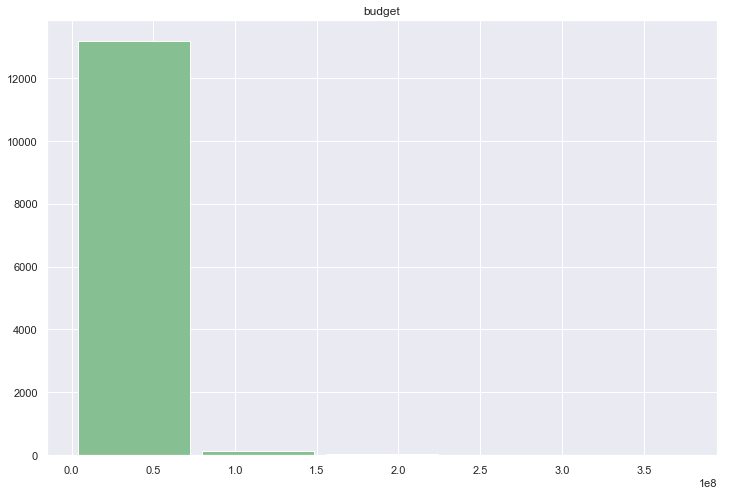

In [23]:
movies_ratings.hist(column='budget', bins=5, grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA855E198>]],
      dtype=object)

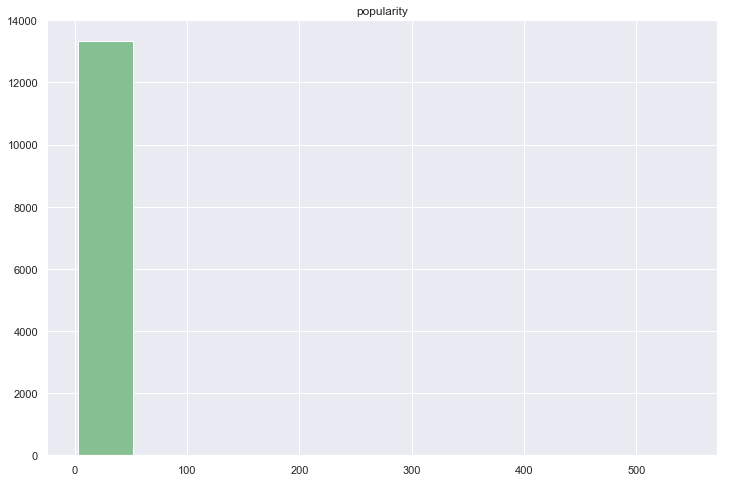

In [24]:
movies_ratings.hist(column='popularity', grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA8397438>]],
      dtype=object)

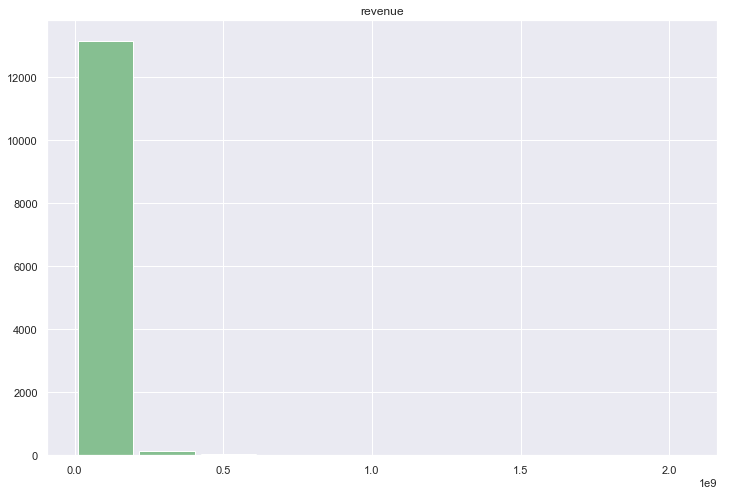

In [25]:
movies_ratings.hist(column='revenue', grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA871C550>]],
      dtype=object)

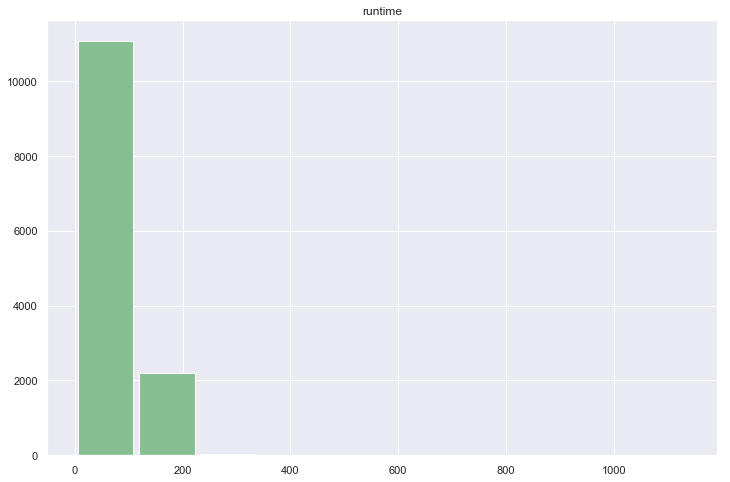

In [26]:
movies_ratings.hist(column='runtime', grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA8959B00>]],
      dtype=object)

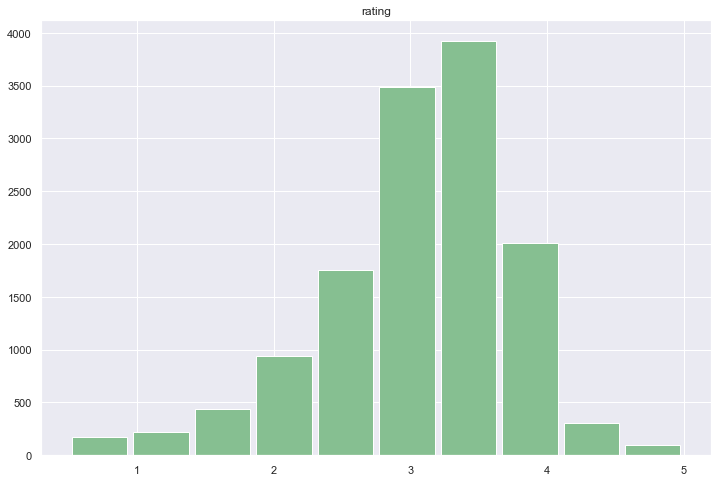

In [27]:
movies_ratings.hist(column='rating', grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

## Detecting outliers

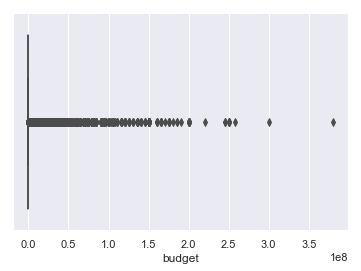

In [28]:
sns.boxplot(x=movies_ratings['budget'])

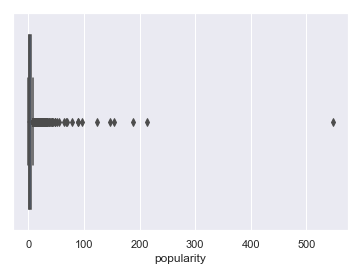

In [29]:
sns.boxplot(x=movies_ratings['popularity'])

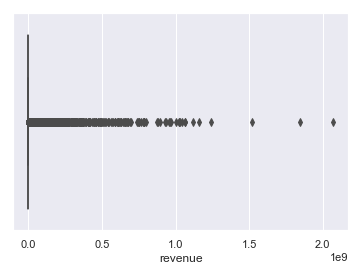

In [30]:
sns.boxplot(x=movies_ratings['revenue'])

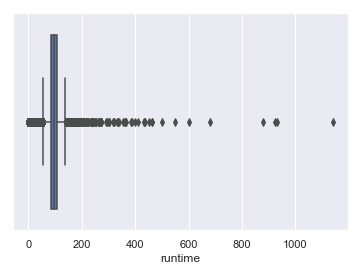

In [31]:
sns.boxplot(x=movies_ratings['runtime'])

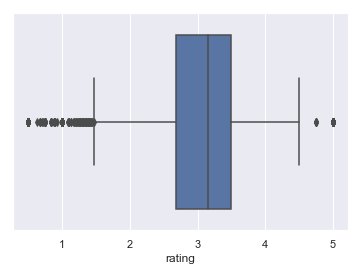

In [32]:
sns.boxplot(x=movies_ratings['rating'])

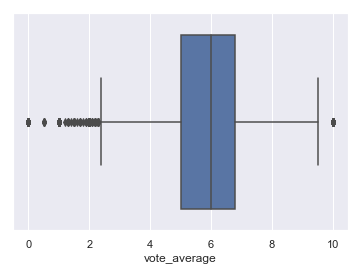

In [33]:
sns.boxplot(x=movies_ratings['vote_average'])

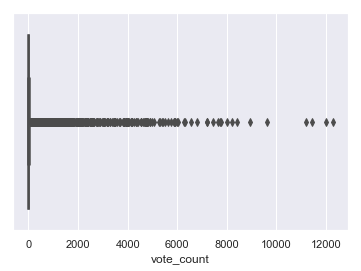

In [34]:
sns.boxplot(x=movies_ratings['vote_count'])

In [35]:
backup = movies_ratings
backup.head()

,budget,id,popularity,release_year,revenue,runtime,title,vote_average,vote_count,rating
0,30000000.0,862.0,21.946943,1995.0,373554033.0,81.0,Toy Story,7.7,5415.0,3.888157
1,65000000.0,8844.0,17.015539,1995.0,262797249.0,104.0,Jumanji,6.9,2413.0,3.236953
2,16000000.0,31357.0,3.859495,1995.0,81452156.0,127.0,Waiting to Exhale,6.1,34.0,2.875713
3,0.0,45325.0,2.561161,1995.0,0.0,97.0,Tom and Huck,5.4,45.0,3.129191
4,35000000.0,9091.0,5.231580,1995.0,64350171.0,106.0,Sudden Death,5.5,174.0,3.008365


In [36]:
movies_ratings = movies_ratings.drop(['title', 'id', 'budget', 'vote_count', 'revenue', 'popularity'], axis=1)

Q1 = movies_ratings.quantile(0.25)
Q3 = movies_ratings.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#z = np.abs(stats.zscore(movies_ratings))
#print(z)

#movies_ratings.dtypes

release_year    31.0000
runtime         21.0000
vote_average     1.8000
rating           0.8125
dtype: float64


### Remove Outliers

In [37]:

movies_ratings = backup[~((movies_ratings < (Q1-1.5 * IQR)) |(movies_ratings > (Q3 + 1.5 * IQR))).any(axis=1)]
movies_ratings.shape

(10471, 10)

In [38]:
movies_ratings.head(25)

,budget,id,popularity,release_year,revenue,runtime,title,vote_average,vote_count,rating
0,30000000.0,862.0,21.946943,1995.0,373554033.0,81.0,Toy Story,7.7,5415.0,3.888157
1,65000000.0,8844.0,17.015539,1995.0,262797249.0,104.0,Jumanji,6.9,2413.0,3.236953
2,16000000.0,31357.0,3.859495,1995.0,81452156.0,127.0,Waiting to Exhale,6.1,34.0,2.875713
3,0.0,45325.0,2.561161,1995.0,0.0,97.0,Tom and Huck,5.4,45.0,3.129191
4,35000000.0,9091.0,5.231580,1995.0,64350171.0,106.0,Sudden Death,5.5,174.0,3.008365
5,0.0,12110.0,5.430331,1995.0,0.0,88.0,Dracula: Dead and Loving It,5.7,210.0,2.672179
7,30000000.0,9273.0,8.205448,1995.0,212385533.0,90.0,Ace Ventura: When Nature Calls,6.1,1128.0,2.633983
8,50000000.0,9691.0,11.065939,1995.0,30303072.0,132.0,Assassins,6.0,394.0,3.157631
9,0.0,16420.0,1.845899,1995.0,0.0,123.0,Othello,7.0,33.0,3.614058
10,0.0,37557.0,1.100915,1995.0,0.0,108.0,Shanghai Triad,6.5,17.0,3.636900


## Distributions without outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA8EED4E0>]],
      dtype=object)

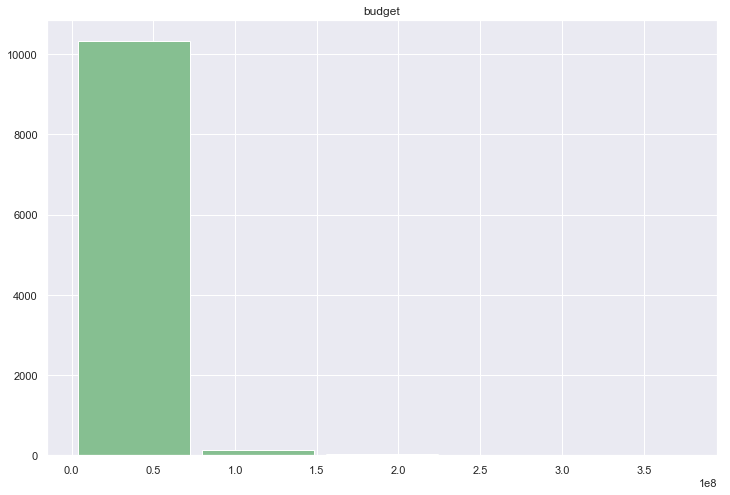

In [39]:
movies_ratings.hist(column='budget', bins=5, grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA915FDD8>]],
      dtype=object)

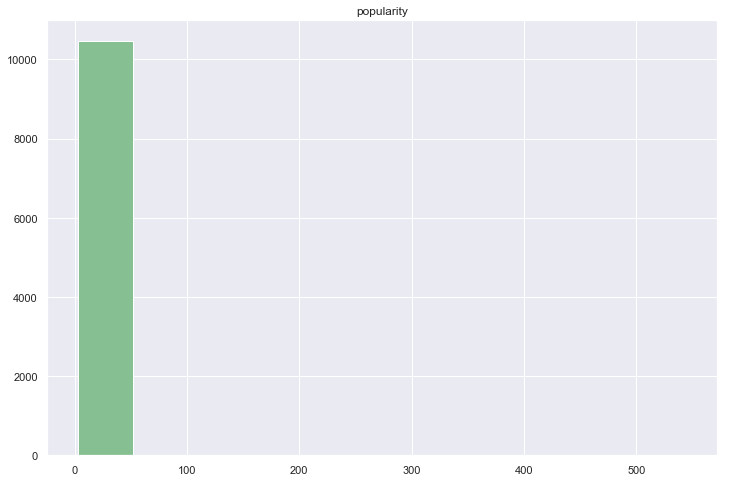

In [40]:
movies_ratings.hist(column='popularity', grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA8F96FD0>]],
      dtype=object)

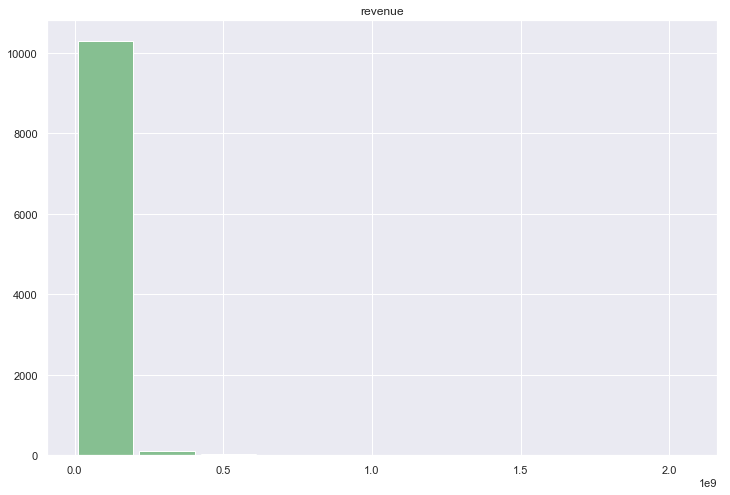

In [41]:
movies_ratings.hist(column='revenue', grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA92E4400>]],
      dtype=object)

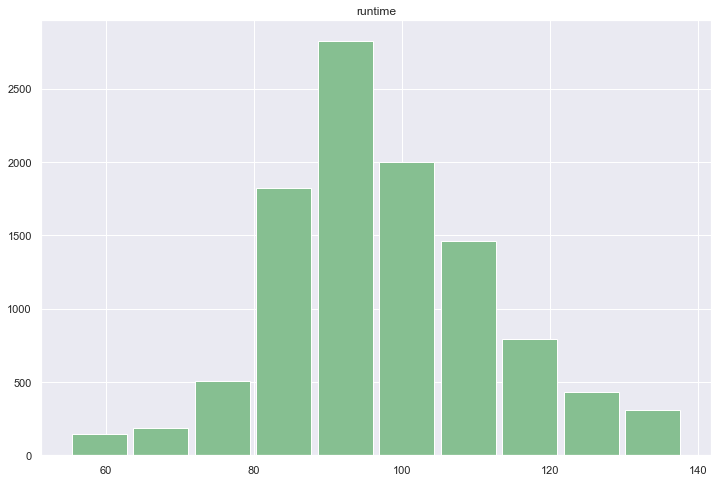

In [42]:
movies_ratings.hist(column='runtime', grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA953F748>]],
      dtype=object)

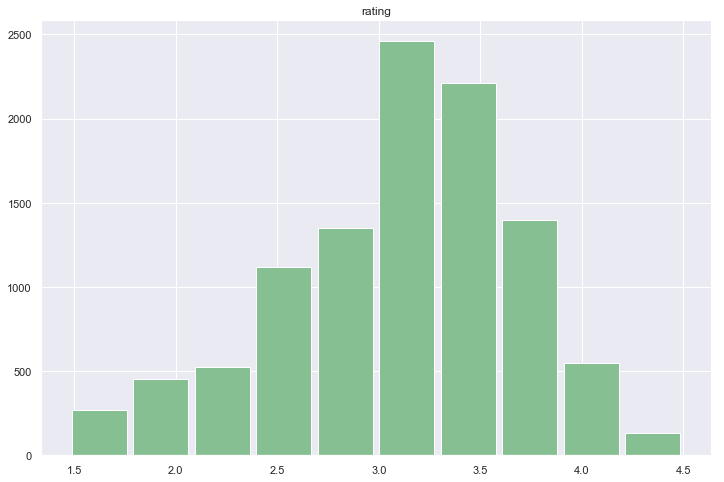

In [43]:
movies_ratings.hist(column='rating', grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

## Finding Correlation

,budget,id,popularity,release_year,revenue,runtime,vote_average,vote_count,rating
budget,1.000000,-0.084339,0.355779,0.141544,0.758981,0.195953,0.028224,0.644341,0.010322
id,-0.084339,1.000000,-0.021849,0.365755,-0.059334,-0.087526,-0.008294,-0.038256,-0.033085
popularity,0.355779,-0.021849,1.000000,0.110267,0.460018,0.135577,0.079957,0.500896,0.057146
release_year,0.141544,0.365755,0.110267,1.000000,0.091828,0.067803,-0.073069,0.116695,-0.041309
revenue,0.758981,-0.059334,0.460018,0.091828,1.000000,0.159726,0.081467,0.803086,0.060809
runtime,0.195953,-0.087526,0.135577,0.067803,0.159726,1.000000,0.165942,0.179765,0.163761
vote_average,0.028224,-0.008294,0.079957,-0.073069,0.081467,0.165942,1.000000,0.135625,0.515075
vote_count,0.644341,-0.038256,0.500896,0.116695,0.803086,0.179765,0.135625,1.000000,0.121963
rating,0.010322,-0.033085,0.057146,-0.041309,0.060809,0.163761,0.515075,0.121963,1.000000


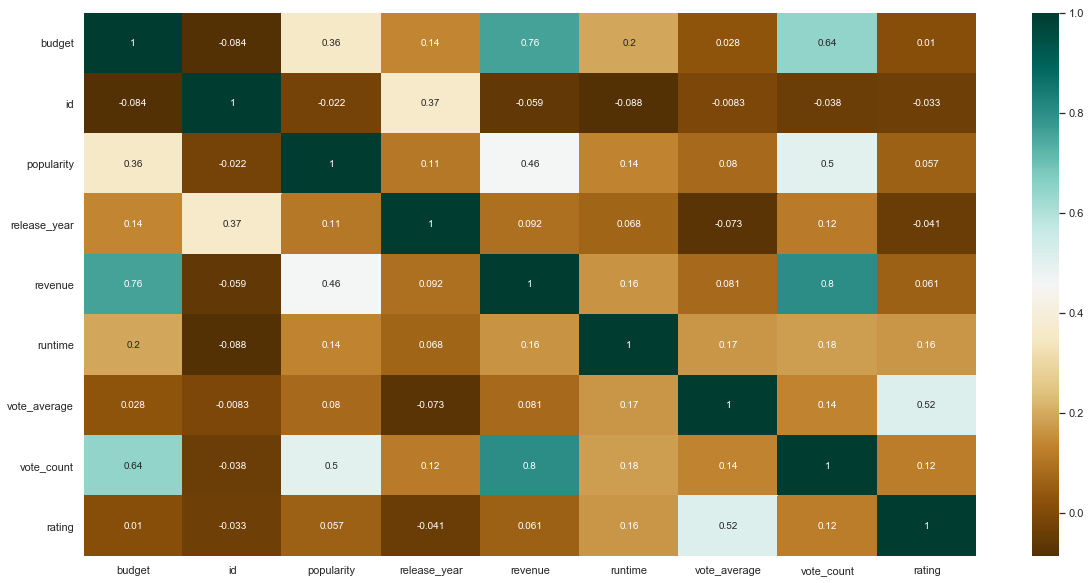

In [44]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= movies_ratings.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

Las correlaciones que se pueden observar son las siguientes: 
- Budget vs Revenue
- Budget vs Vote count
- Vote average vs Rating

## Budget vs Revenue

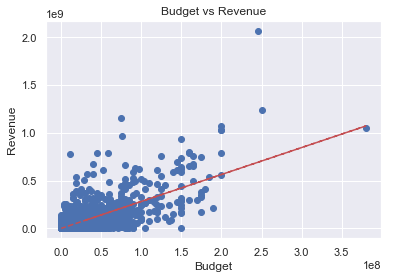

In [45]:
# Plotting a scatter plot
#fig, ax = plt.subplots(figsize=(10,6))
#ax.scatter(movies_ratings['budget'], movies_ratings['revenue'])
#ax.set_xlabel('Budget')
#ax.set_ylabel('Revenue')

x = movies_ratings['budget']
y = movies_ratings['revenue']
plt.scatter(x, y)

plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


plt.show()

Podemos ver como el Revenue aumenta mientras aumenta el budget. Pero aumenta hasta cierto punto donde un mayor budget no necesariamente va a representar un mayor revenue.

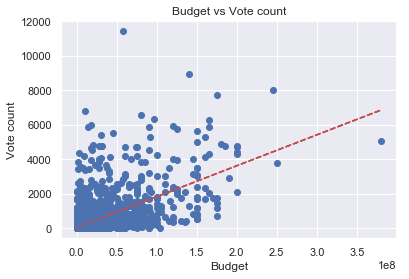

In [46]:
x = movies_ratings['budget']
y = movies_ratings['vote_count']
plt.scatter(x, y)

plt.title("Budget vs Vote count")
plt.xlabel("Budget")
plt.ylabel("Vote count")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


plt.show()

Podemos ver como la cantidad de votos también tiende a aumentar con el budget de una pelicula, 

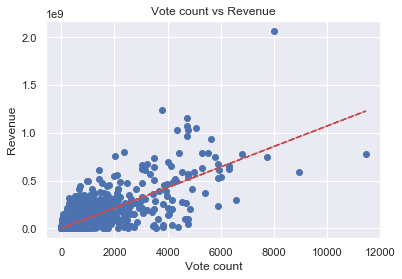

In [47]:
x = movies_ratings['vote_count']
y = movies_ratings['revenue']
plt.scatter(x, y)

plt.title("Vote count vs Revenue")
plt.xlabel("Vote count")
plt.ylabel("Revenue")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


plt.show()

Tambien existe una correlacion entre la la cantidad de votos y el revenue de una pelicula, donde entre más votan las personas esas peliculas tienden a tener un mayor revenue. Pero al igual que en la comparación con el budget, tiende a haber un limite de crecimiento del revenue. 

## Conclusiones

- Usualmente un mayor budget va a representar un mayor revenue para la pelicula, pero tiene un limite y no es algo garantizado
- Se podría suponer que una mayor budget o un mayor revenue tendría una correlacion positiva con el rating de una pelicula, pero el análisis demostró que no existe una correlacion entre estas variables. 
- La mayoria de peliculas tienen un budget, revenue y popularity muy parecido o cercano, en base a los histogramas. 
- El eliminar outliers con el método IQR Score no pudo un mayor impacto en el analisis. 
